<a href="https://colab.research.google.com/github/RendiZein/Metode-Rekayasa-Komputasi/blob/main/RK_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necesarry library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import timedelta

# Main code

Improvement :

## Nomor 7

Analsisis :
1. RK 4 memiliki nilai

### bagian a


In [16]:
def rk_o2(dt=0.02):
  #defined variable
  start_time = time.monotonic()
   #delta time
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y_p=np.zeros(len(t))
  e=np.zeros(len(t))
  y_p[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y_p[j])#calculate k1
      k2[j+1]=f(t[j+1], y_p[j]+k1[j+1]*dt)#calculate k2
      y_p[j+1]=y_p[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  df = pd.DataFrame(list(zip(t, y_p, y_t, e,k1,k2)),
                columns =['t','y pred', 'y true', 'error(%)','k1','k2'])
  display(df)
  plt.plot(t, y_p, 'bo--', label='Euler Method')
  plt.plot(t, y_t, 'g', label='Analytical')
  plt.title('Comparison For Euler Method and Analytical')
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()
  print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


,t,y pred,y true,error(%),k1,k2
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000
1,0.02,4.940600,4.940596,0.000081,-3.000000,-2.940000
2,0.04,4.882376,4.882368,0.000160,-2.940600,-2.881788
3,0.06,4.825305,4.825294,0.000238,-2.882376,-2.824729
4,0.08,4.769364,4.769349,0.000314,-2.825305,-2.768799
5,0.10,4.714531,4.714512,0.000390,-2.769364,-2.713977
6,0.12,4.660783,4.660761,0.000464,-2.714531,-2.660240
7,0.14,4.608099,4.608075,0.000536,-2.660783,-2.607567
8,0.16,4.556459,4.556431,0.000608,-2.608099,-2.555937
9,0.18,4.505841,4.505811,0.000677,-2.556459,-2.505330


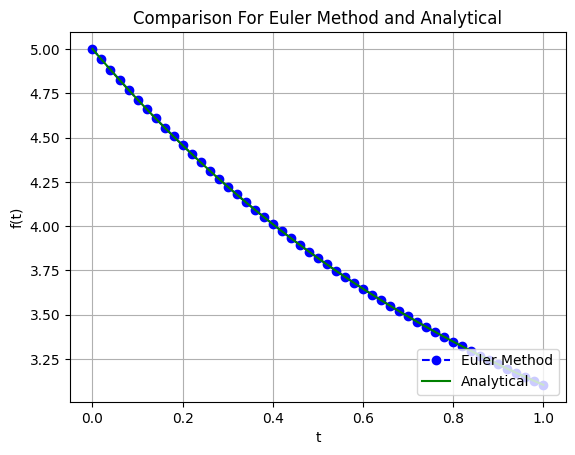

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001811


In [17]:
rk_o2(dt=0.02)

### Bagian B

,t,y pred,y true,error(%),k1,k2,k3,k4
0,0.00,5.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.02,4.940596,4.940596,1.613863e-09,-3.000000,-2.970000,-2.970000,-2.940594
2,0.04,4.882368,4.882368,3.201531e-09,-2.940596,-2.911190,-2.911190,-2.882366
3,0.06,4.825294,4.825294,4.762887e-09,-2.882368,-2.853545,-2.853545,-2.825292
4,0.08,4.769349,4.769349,6.297765e-09,-2.825294,-2.797041,-2.797041,-2.769347
5,0.10,4.714512,4.714512,7.806078e-09,-2.769349,-2.741656,-2.741656,-2.714510
6,0.12,4.660761,4.660761,9.287704e-09,-2.714512,-2.687367,-2.687367,-2.660759
7,0.14,4.608075,4.608075,1.074254e-08,-2.660761,-2.634154,-2.634154,-2.608073
8,0.16,4.556431,4.556431,1.217048e-08,-2.608075,-2.581994,-2.581994,-2.556430
9,0.18,4.505811,4.505811,1.357145e-08,-2.556431,-2.530867,-2.530867,-2.505809


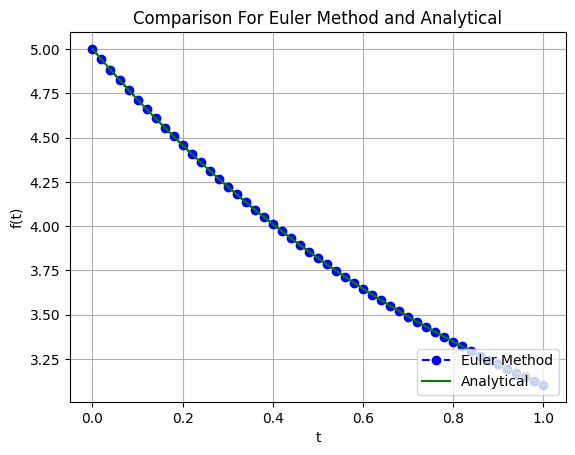

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.002448


In [11]:
#defined variable
start_time = time.monotonic()
dt=0.02 #delta time
f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
H = int((1-0)/dt)  # defined variable for how much step
t=np.linspace(0, 1, H+1) #defined variable for time
k1=np.zeros(len(t))
k2=np.zeros(len(t))
k3=np.zeros(len(t))
k4=np.zeros(len(t))
y_t=np.zeros(len(t))
y_p=np.zeros(len(t))
e=np.zeros(len(t))
y_p[0]=5
y_t[0]=5
e[0]=0
k1[0]=0
k2[0]=0
# e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
#looping
for j in range(len(t)-1):
    #calculate y_true
    y_t[j+1]=f_t(t[j+1])
    #calculate y_pred
    k1[j+1]=f(t[j],y_p[j])#calculate k1
    k2[j+1]=f(t[j]+dt/2, y_p[j]+k1[j+1]*dt/2)#calculate k2
    k3[j+1]=f(t[j]+dt/2, y_p[j]+k2[j+1]*dt/2)#calculate k2#calculate k3
    k4[j+1]=f(t[j+1], y_p[j]+k3[j+1]*dt)#calculate k2#calculate k3#calculate k4
    y_p[j+1]=y_p[j]+(k1[j+1]+2*k2[j+1]+2*k3[j+1]+k4[j+1])*dt/6 #calculate y_pred
    #calculate error
    e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
end_time = time.monotonic()
delta_time=timedelta(seconds=end_time - start_time)
df = pd.DataFrame(list(zip(t, y_p, y_t, e,k1,k2,k2,k4)),
              columns =['t','y pred', 'y true', 'error(%)','k1','k2','k3','k4'])
display(df)
plt.plot(t, y_p, 'bo--', label='Euler Method')
plt.plot(t, y_t, 'g', label='Analytical')
plt.title('Comparison For Euler Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


### Bagian C

#### additional function

##### RK Orde 2

In [18]:
def rk_o2(dt=0.02):
  #defined variable
  start_time = time.monotonic()
   #delta time
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y_p=np.zeros(len(t))
  e=np.zeros(len(t))
  y_p[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y_p[j])#calculate k1
      k2[j+1]=f(t[j+1], y_p[j]+k1[j+1]*dt)#calculate k2
      y_p[j+1]=y_p[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
  return y_p, y_t, e, t


##### RK Orde 4

In [20]:
def rk_o4(dt=0.02):
  #defined variable
  start_time = time.monotonic()
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y_p=np.zeros(len(t))
  e=np.zeros(len(t))
  y_p[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y_p[j])#calculate k1
      k2[j+1]=f(t[j]+dt/2, y_p[j]+k1[j+1]*dt/2)#calculate k2
      k3[j+1]=f(t[j]+dt/2, y_p[j]+k2[j+1]*dt/2)#calculate k2#calculate k3
      k4[j+1]=f(t[j+1], y_p[j]+k3[j+1]*dt)#calculate k2#calculate k3#calculate k4
      y_p[j+1]=y_p[j]+(k1[j+1]+2*k2[j+1]+2*k3[j+1]+k4[j+1])*dt/6 #calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
  return y_p,e

##### Euler Modified Single

In [21]:
def euler_modified_single(delta_t=0.1, er=1.):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/delta_t)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y_p=np.zeros(len(t))
    e = np.zeros(len(t))
    k = np.zeros(len(t))
    y_p[0]=y_t[0]=5
    k[0]=0
    e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100

    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_k
        e[j+1]=1 #inisiasi untuk mencegah error
        yk = [y_p[j]+f(t[j], y_p[j])*delta_t] # inisiasi y korektor
        e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
        while e[j+1]>er:
          yk.append(y_p[j]+(f(t[j], y_p[j])+f(t[j+1], yk[-1]))*delta_t*0.5)
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100

        k[j+1]=len(yk)-1
        y_p[j+1]=yk[-1]

        #calculate error
        e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
    return y_p, e

##### Euler Single

In [22]:
#defined variable
def euler_single(delta_t=0.1):
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/delta_t)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y_p=np.zeros(len(t))
    e = np.zeros(len(t))
    y_p[0]=y_t[0]=5
    e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_pred
        y_p[j+1]=y_p[j]+f(t[j], y_p[j])*delta_t
        #calculate error
        e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
    return y_p, e


#### Perbandingan

In [23]:
yp_ems, e_ems=euler_modified_single(delta_t=0.02, er=1.)
yp_es, e_es=euler_single(delta_t=0.02)
yp_rko2, y_t, e_rko2, t =rk_o2(dt=0.02)
yp_rko4, e_rko4 = rk_o4(dt=0.02)

In [25]:
df = pd.DataFrame(list(zip(t, y_t, yp_ems, e_ems, yp_es, e_es, yp_rko2,e_rko2, yp_rko4, e_rko4)),
              columns =['t', 'y_t','yp_ems','e_ems', 'yp_es','e_es', 'yp_rko2','e_rko2','yp_rko4', 'e_rko4'])
display(df)

,t,y_t,yp_ems,e_ems,yp_es,e_es,yp_rko2,e_rko2,yp_rko4,e_rko4
0,0.00,5.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000e+00
1,0.02,4.940596,4.940000,0.012064,4.940000,0.012064,4.940600,0.000081,4.940596,1.613863e-09
2,0.04,4.882368,4.881200,0.023929,4.881200,0.023929,4.882376,0.000160,4.882368,3.201531e-09
3,0.06,4.825294,4.823576,0.035596,4.823576,0.035596,4.825305,0.000238,4.825294,4.762887e-09
4,0.08,4.769349,4.767104,0.047062,4.767104,0.047062,4.769364,0.000314,4.769349,6.297765e-09
5,0.10,4.714512,4.711762,0.058328,4.711762,0.058328,4.714531,0.000390,4.714512,7.806078e-09
6,0.12,4.660761,4.657527,0.069391,4.657527,0.069391,4.660783,0.000464,4.660761,9.287704e-09
7,0.14,4.608075,4.604377,0.080253,4.604377,0.080253,4.608099,0.000536,4.608075,1.074254e-08
8,0.16,4.556431,4.552289,0.090911,4.552289,0.090911,4.556459,0.000608,4.556431,1.217048e-08
9,0.18,4.505811,4.501243,0.101366,4.501243,0.101366,4.505841,0.000677,4.505811,1.357145e-08


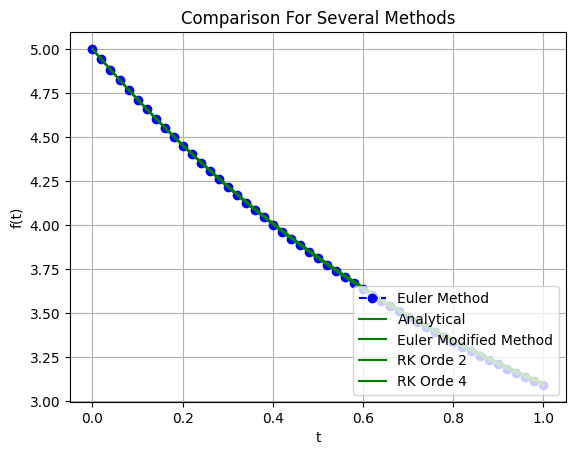

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001921


In [24]:
plt.plot(t, yp_es, 'bo--', label='Euler Method')
plt.plot(t, y_t, 'g', label='Analytical')
plt.plot(t, yp_ems, 'g', label='Euler Modified Method')
plt.plot(t, yp_rko2, 'g', label='RK Orde 2')
plt.plot(t, yp_rko4, 'g', label='RK Orde 4')

plt.title('Comparison For Several Methods')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

## Nomor 8